In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('Automobile_data.csv', usecols=['engine-size', 'height'])

In [36]:
df.head()

,height,engine-size
0,48.8,130
1,48.8,130
2,52.4,152
3,54.3,109
4,54.3,136


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
height         205 non-null float64
engine-size    205 non-null int64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [38]:
#Mengetahui jumlah kolom dan baris dari data.
df.shape

(205, 2)

In [39]:
df['engine-size'].replace('?','0', inplace=True)
df['height'].replace('?','0', inplace=True)

In [40]:
df['engine-size'] = [int(x) for x in df['engine-size']]
df['height'] = [int(x) for x in df['height']]

In [41]:
df.describe()

,height,engine-size
count,205.000000,205.000000
mean,53.258537,126.907317
std,2.472692,41.642693
min,47.000000,61.000000
25%,52.000000,97.000000
50%,54.000000,120.000000
75%,55.000000,141.000000
max,59.000000,326.000000


In [42]:
df.isnull().sum()

height         0
engine-size    0
dtype: int64

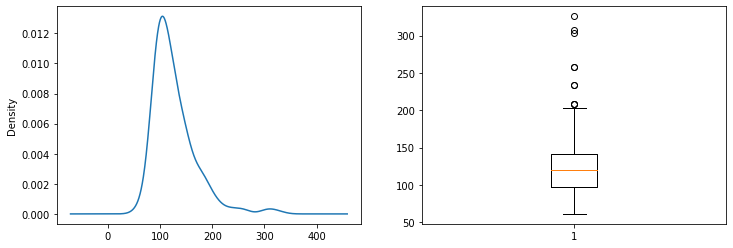

In [43]:
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['engine-size'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['engine-size'])
plt.show()

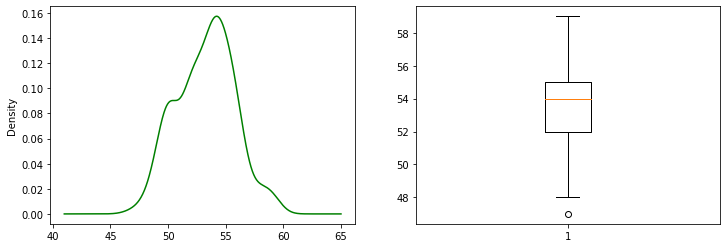

In [46]:
#Univariate analysis price.
#Melihat distribusi dari price.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['height'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['height'])
plt.show()

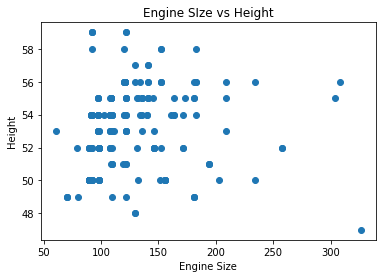

In [48]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['engine-size'], df['height'])
plt.xlabel('Engine Size')
plt.ylabel('Height')
plt.title('Engine SIze vs Height')
plt.show()

In [49]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,height,engine-size
height,1.00000,0.06236
engine-size,0.06236,1.00000


In [26]:
#buat variabel x dan y.
x = df['eng'].values.reshape(-1,1)
y = df['peak-rpm'].values.reshape(-1,1)

In [27]:
#sisihkan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
#membuat object model
lin_reg = LinearRegression()

In [29]:
#training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#print coefisieen dan intercept
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[5.0371502]]
[4525.61976519]


In [31]:
lin_reg.score(x_test, y_test)

-0.1634828874574128

Text(0.5, 1.0, 'Plot Horsepower vs Price')

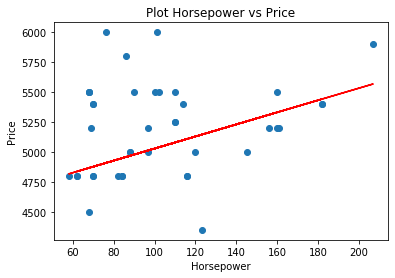

In [32]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

#sumber : https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf